In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from merge_module import Split_area
from visualization import  Scatter, Day_plot, NullPlot, TimeBar
from visualization import Monthly_plot

# Load data

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/SolarPower/MappingData.csv')
print(df.shape)
df.head()

(129117, 14)


,Date,Area,Time,Photovoltaics,PM10,Temperature,Wind velocity,Wind direction,Humidity,Sea-level pressure,Solar radiation,Cloudy,Visibility,Month
0,2013-01-01,전남 목포시,1,0.0,44.0,-2.2,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,1
1,2013-01-01,전남 목포시,2,0.0,34.0,-2.4,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,1
2,2013-01-01,전남 목포시,3,0.0,41.0,-2.7,3.6,160.0,95.0,1020.8,NaN,7.0,1800.0,1
3,2013-01-01,전남 목포시,4,0.0,41.0,-2.9,4.0,160.0,94.0,1020.0,NaN,7.0,1800.0,1
4,2013-01-01,전남 목포시,5,0.0,35.0,-2.4,3.0,160.0,91.0,1019.3,NaN,10.0,1200.0,1


In [4]:
area_list = ['전남 목포시', '강원 강릉시', '경남 진주시']
Mp_df, Gn_df, Jj_df = Split_area(df, 'Area', area_list)

전체 : (129117, 14)
['전남 목포시'] : (60796, 14)
['강원 강릉시'] : (35063, 14)
['경남 진주시'] : (33258, 14)


# Delete Nighttime

In [5]:
def Drop_idx(df):
  data = df.copy()
  idx = data[data['Photovoltaics'] == 0].index
  data.drop(idx, inplace=True)
  data.dropna(subset=['Photovoltaics'], inplace=True)
  data.reset_index(inplace=True, drop=True)
  return data

In [6]:
drop_data = Drop_idx(df)

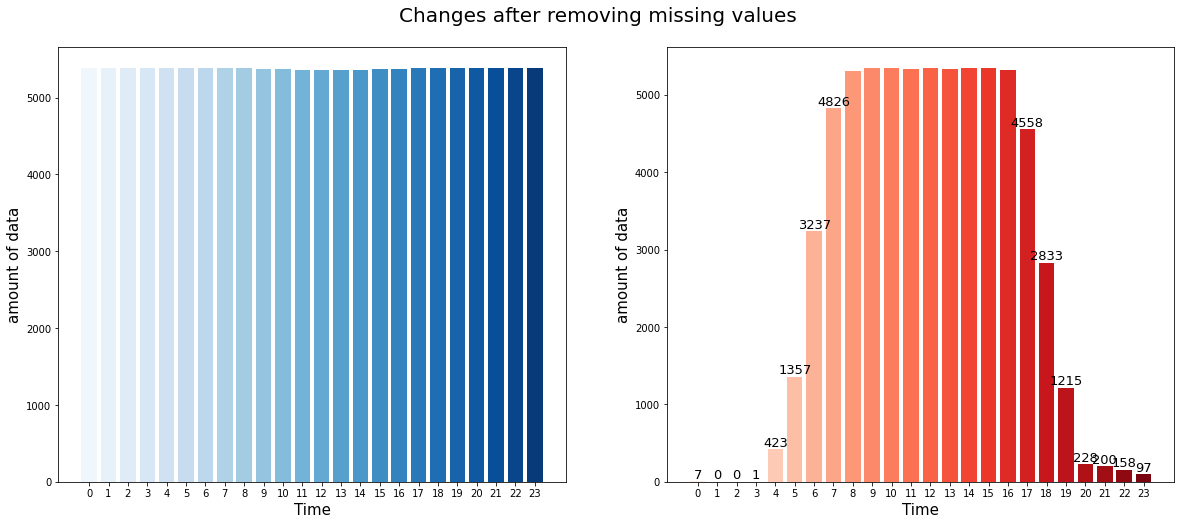

In [7]:
time_df = []
drop_df = []
for h in df['Time'].unique():
  all_df = df[df['Time'] == h]
  drop_null = drop_data[drop_data['Time'] == h]
  time_df.append(len(all_df))
  drop_df.append(len(drop_null))

fig, [ax1,ax2] = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

pal1 = sns.color_palette("Blues", len(time_df))
pal2 = sns.color_palette("Reds", len(drop_df))

plt.suptitle(f'Changes after removing missing values', fontsize=20, y=0.95)
ax1.set_xticks(range(0,24))
ax1.set_xticklabels(range(0,24))
ax1.set_xlabel('Time', fontsize=15)
ax1.set_ylabel('amount of data', fontsize=15)

ax1.bar(range(0,len(time_df)), time_df, color=pal1)
# ax2 = ax1.twinx().twiny()
bar = ax2.bar(range(0,len(drop_df)), drop_df, color=pal2)
ax2.set_xticks(range(0,24))
ax2.set_xticklabels(range(0,24))
ax2.set_xlabel('Time', fontsize=15)
ax2.set_ylabel('amount of data', fontsize=15)

for b in bar:
  x = b.get_x() + b.get_width()/2.0
  y = b.get_height()
  if y <= 5000:
    ax2.text(x, y, y, ha='center', va='bottom', fontsize=13)
plt.show()

In [8]:
def Drop_idx(df, drop_times):
  data = df.copy()
  drop_idx = []
  night_idx = data[data['Time'].isin(drop_times)].index # 밤 시간대 제거
  zero_idx = data[data['Photovoltaics'] == 0].index # 그 외에도 발전량이 0인 행 제거
  drop_idx.extend([i for i in night_idx])
  drop_idx.extend([i for i in zero_idx])
  data.drop(drop_idx, inplace=True)
  data.dropna(subset=['Photovoltaics'], inplace=True)
  data.reset_index(inplace=True, drop=True)
  return data

In [9]:
drop_times = [0, 1, 2, 3, 4, 21, 22, 23]
daytime_df = Drop_idx(df, drop_times)
daytime_df

,Date,Area,Time,Photovoltaics,PM10,Temperature,Wind velocity,Wind direction,Humidity,Sea-level pressure,Solar radiation,Cloudy,Visibility,Month
0,2013-01-01,전남 목포시,9,20.16,43.0,2.6,6.0,290.0,91.0,1019.6,0.03,10.0,1300.0,1
1,2013-01-01,전남 목포시,10,106.80,56.0,4.2,5.8,250.0,82.0,1019.9,0.57,7.0,1300.0,1
2,2013-01-01,전남 목포시,11,469.56,75.0,3.8,7.1,320.0,80.0,1020.5,1.00,9.0,1300.0,1
3,2013-01-01,전남 목포시,12,504.24,84.0,4.9,2.8,290.0,73.0,1020.1,1.05,7.0,1300.0,1
4,2013-01-01,전남 목포시,13,745.20,78.0,5.2,6.7,320.0,66.0,1019.7,1.14,6.0,1100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66470,2020-11-15,경남 진주시,17,1.00,NaN,16.5,1.3,180.0,53.0,1025.2,0.34,0.0,2000.0,11
66471,2020-11-16,경남 진주시,6,1.00,NaN,3.5,0.2,0.0,97.0,1026.6,NaN,9.0,432.0,11
66472,2020-11-16,경남 진주시,7,13.00,NaN,3.8,0.0,0.0,97.0,1026.6,NaN,10.0,578.0,11
66473,2020-11-16,경남 진주시,8,40.00,NaN,4.9,0.0,0.0,97.0,1026.9,0.11,8.0,565.0,11


In [10]:
daytime_df['Time'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,  8, 19,  7, 20,  6,  5])

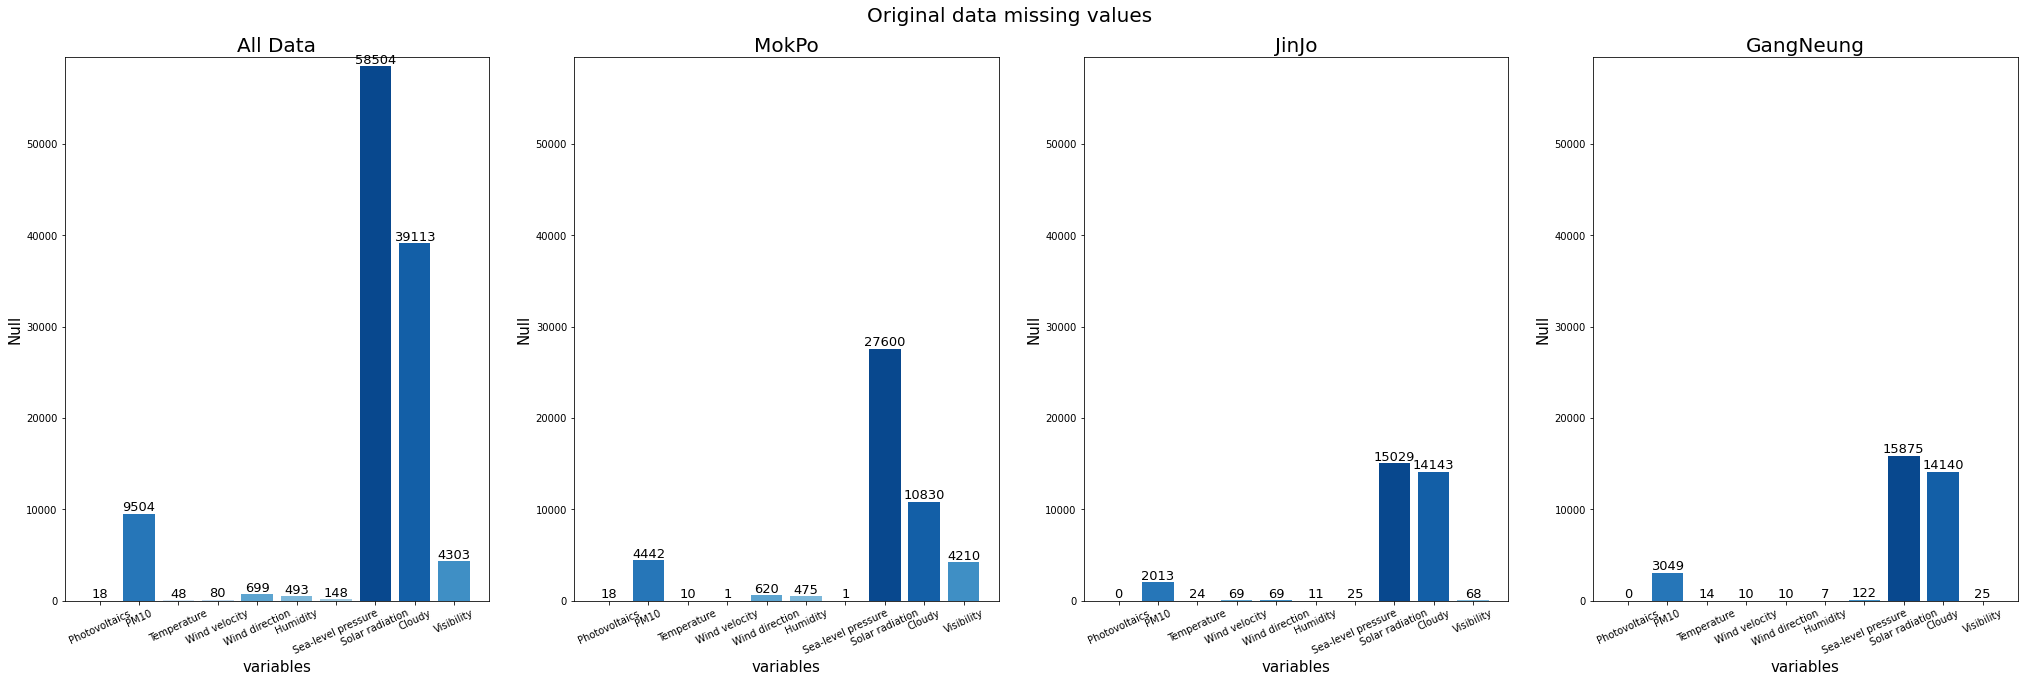

In [11]:
df_list = [df, Mp_df, Jj_df, Gn_df]
NullPlot(df, df_list, 'Original data missing values')

In [12]:
area_list = ['전남 목포시', '강원 강릉시', '경남 진주시']
Mp_df, Gn_df, Jj_df = Split_area(daytime_df, 'Area', area_list)

전체 : (66475, 14)
['전남 목포시'] : (30944, 14)
['강원 강릉시'] : (17671, 14)
['경남 진주시'] : (17860, 14)


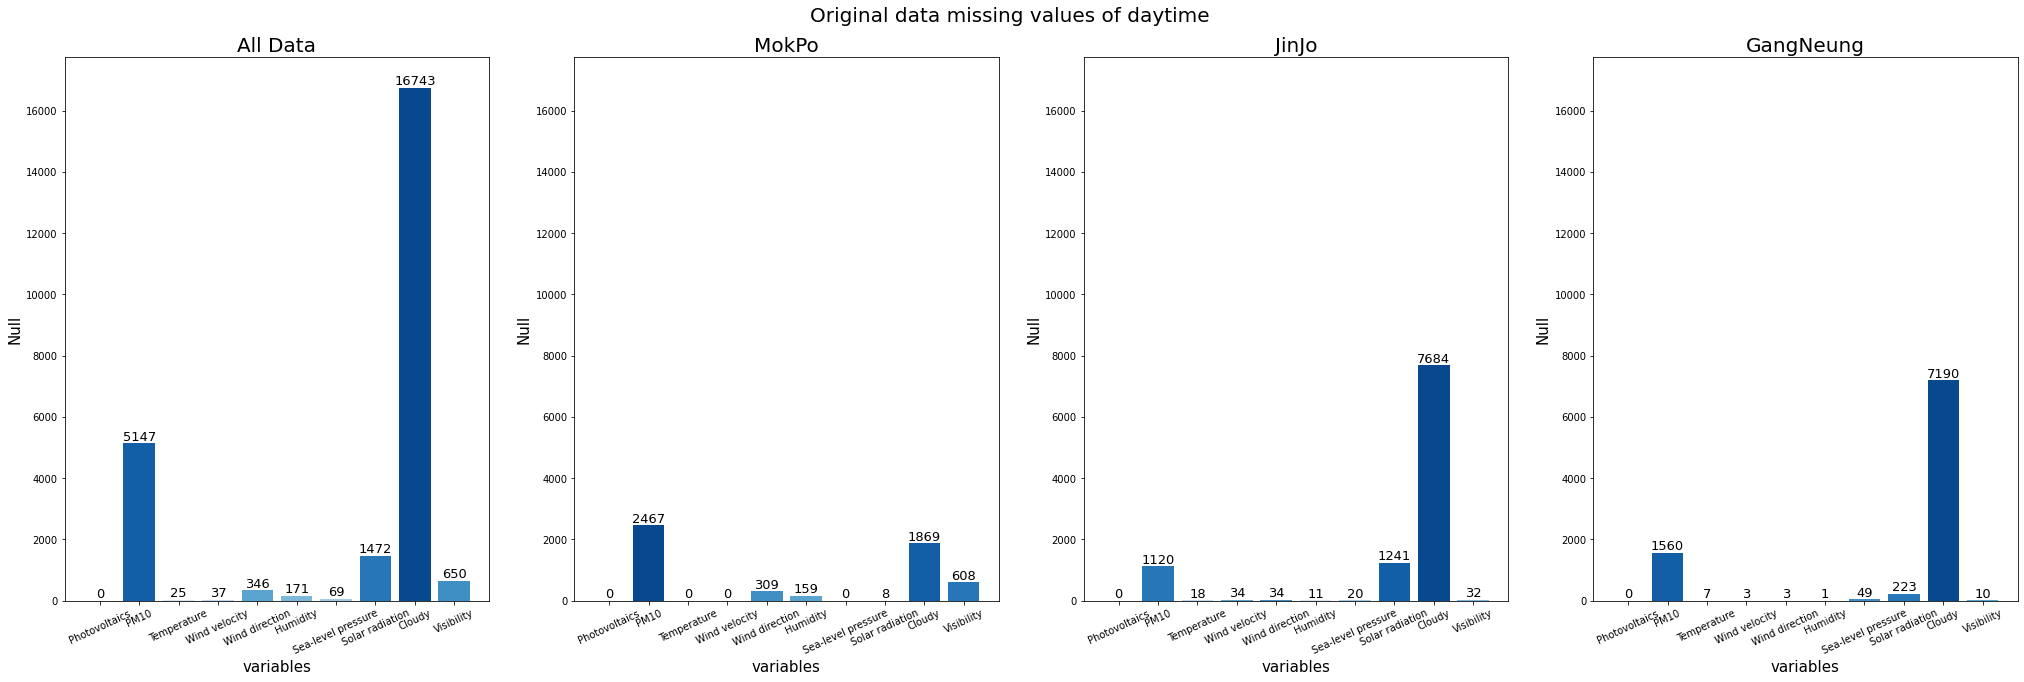

In [13]:
df_list = [daytime_df, Mp_df, Jj_df, Gn_df]
NullPlot(daytime_df, df_list, 'Original data missing values of daytime')

# missing values

In [14]:
data = daytime_df.dropna(how='any') # 데이터의 결측치 모두 제거
data.reset_index(inplace=True, drop=True)
data.shape 

(43771, 14)

In [15]:
area_list = ['전남 목포시', '강원 강릉시', '경남 진주시']
Mp_df, Gn_df, Jj_df = Split_area(data, 'Area', area_list)

전체 : (43771, 14)
['전남 목포시'] : (26389, 14)
['강원 강릉시'] : (8908, 14)
['경남 진주시'] : (8474, 14)


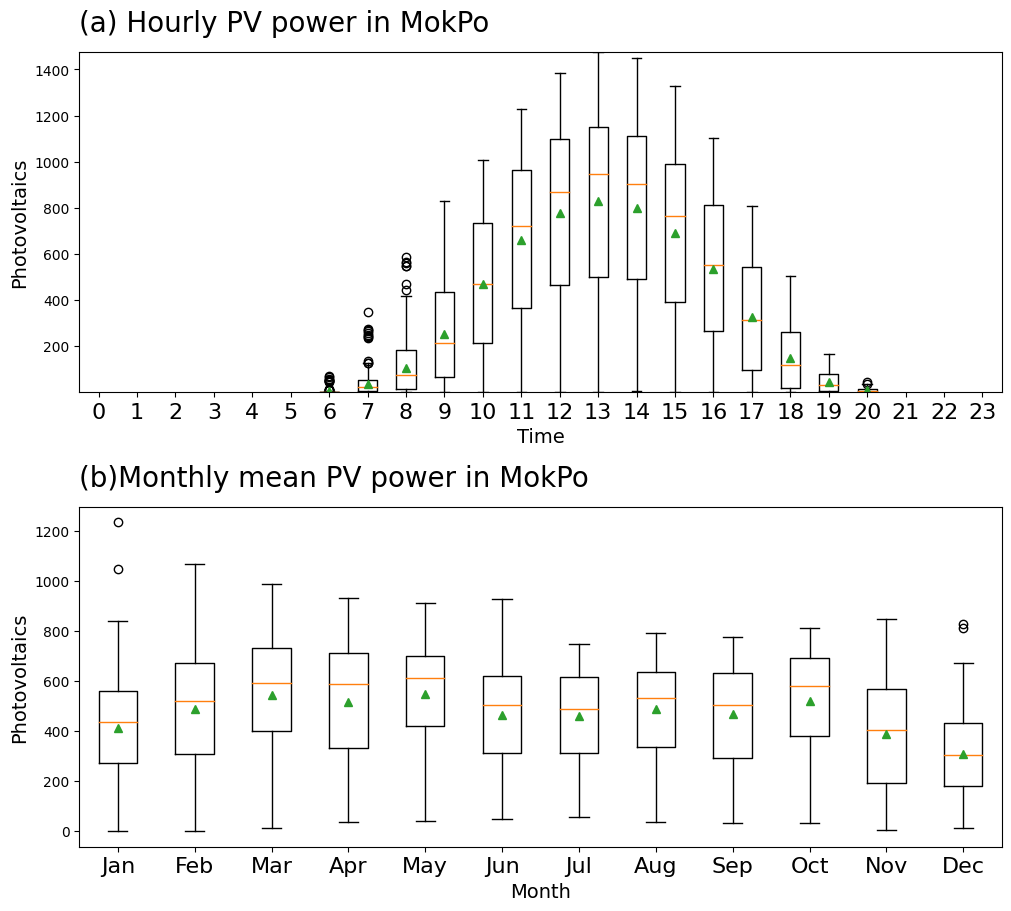

In [16]:
Monthly_plot(Mp_df, 'Photovoltaics', 'MokPo')

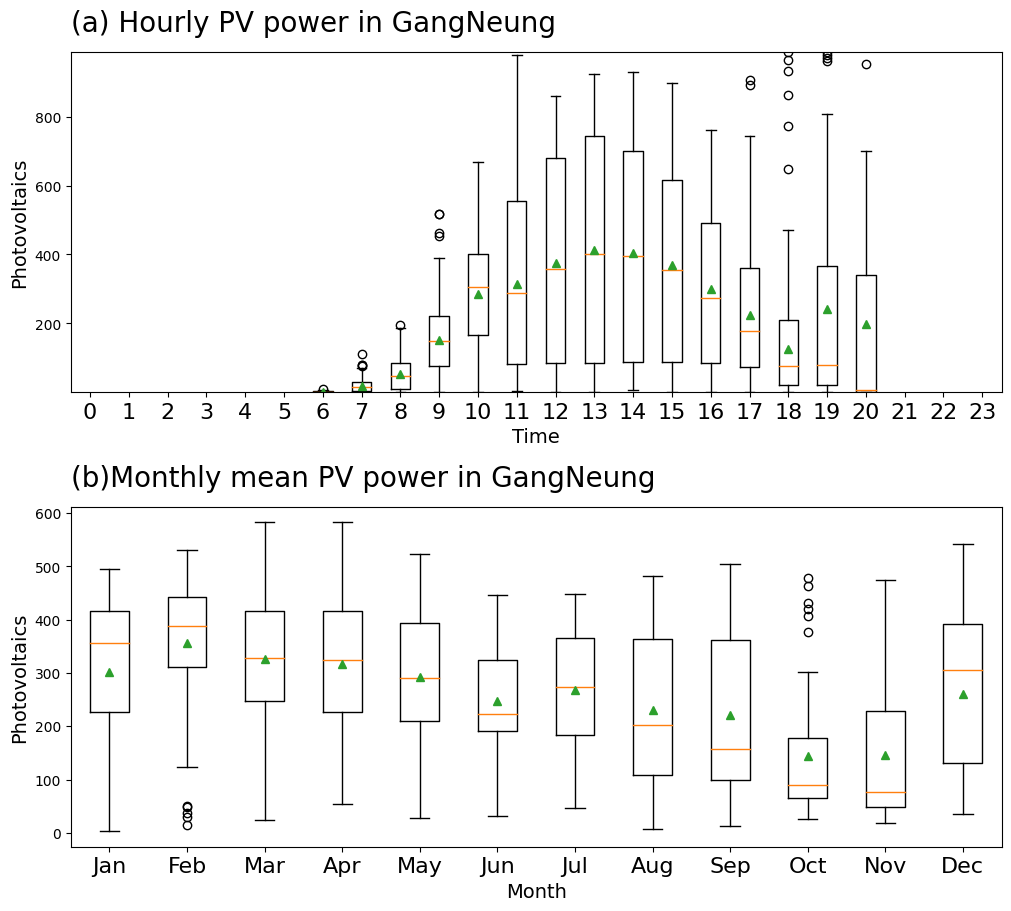

In [17]:
Monthly_plot(Gn_df, 'Photovoltaics', 'GangNeung')

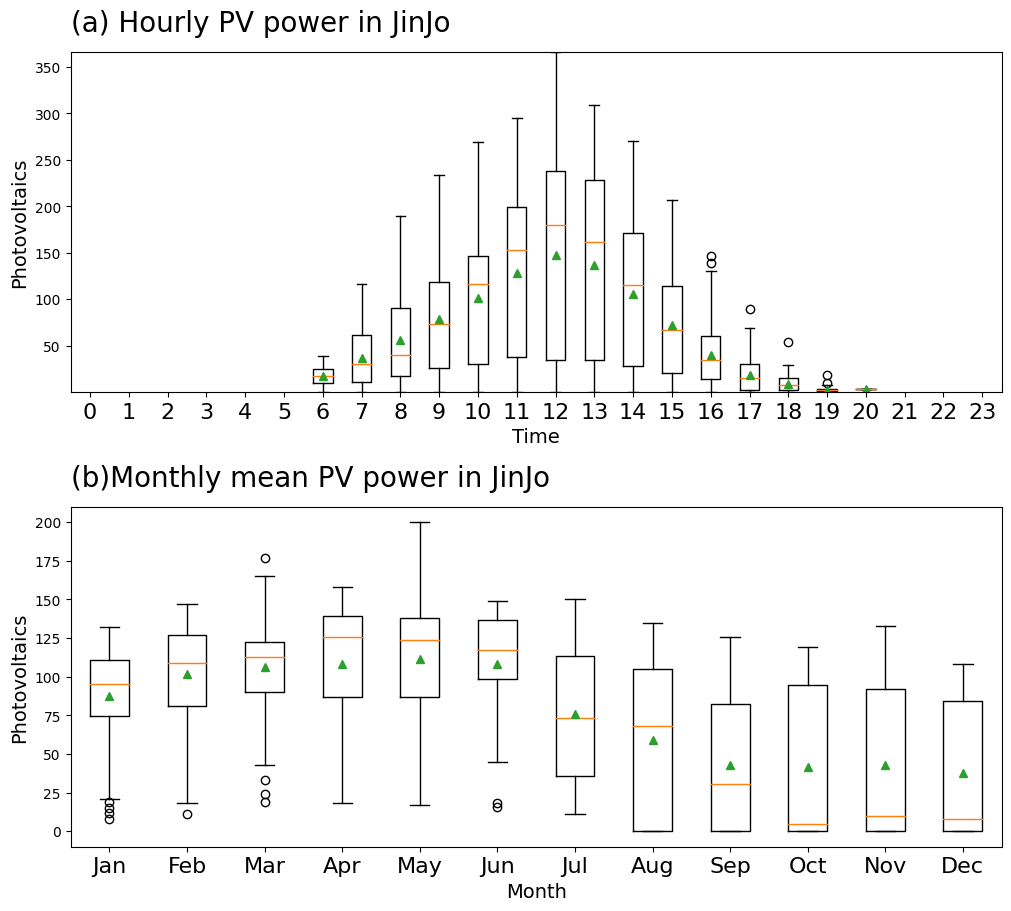

In [18]:
Monthly_plot(Jj_df, 'Photovoltaics', 'JinJo')

# Delete outlier

In [19]:
def Outlier_data(area_df):
  df = area_df.copy()

  for m in area_df['Month'].unique():
    for h in area_df['Time'].unique():
      Month_df = df[(df['Month'] == m) & (df['Time'] == h)]
    
      q1 = Month_df['Photovoltaics'].quantile(0.25)
      q3 = Month_df['Photovoltaics'].quantile(0.75)
      iqr = q3 - q1

      max_out = Month_df[Month_df['Photovoltaics'] > q3 + (1.5*iqr)].index
      min_out = Month_df[Month_df['Photovoltaics'] < q1 - (1.5*iqr)].index
      df = df.drop(max_out)
      df = df.drop(min_out)

  for h in df['Time'].unique():
    Time_df = df[df['Time'] == h]
    
    q1 = Time_df['Photovoltaics'].quantile(0.25)
    q3 = Time_df['Photovoltaics'].quantile(0.75)
    iqr = q3 - q1

    max_out = Time_df[Time_df['Photovoltaics'] > q3 + (1.5*iqr)].index
    min_out = Time_df[Time_df['Photovoltaics'] < q1 - (1.5*iqr)].index
    df = df.drop(max_out)
    df = df.drop(min_out)

  for m in df['Month'].unique():
    Month_df = df[df['Month'] == m]
    
    q1 = Month_df['Photovoltaics'].quantile(0.25)
    q3 = Month_df['Photovoltaics'].quantile(0.75)
    iqr = q3 - q1

    max_out = Month_df[Month_df['Photovoltaics'] > q3 + (1.5*iqr)].index
    min_out = Month_df[Month_df['Photovoltaics'] < q1 - (1.5*iqr)].index
    df = df.drop(max_out)
    df = df.drop(min_out)

  return df

In [20]:
print(Mp_df.shape)
Mp_df = Outlier_data(Mp_df)
Mp_df.shape

(26389, 14)


(26192, 14)

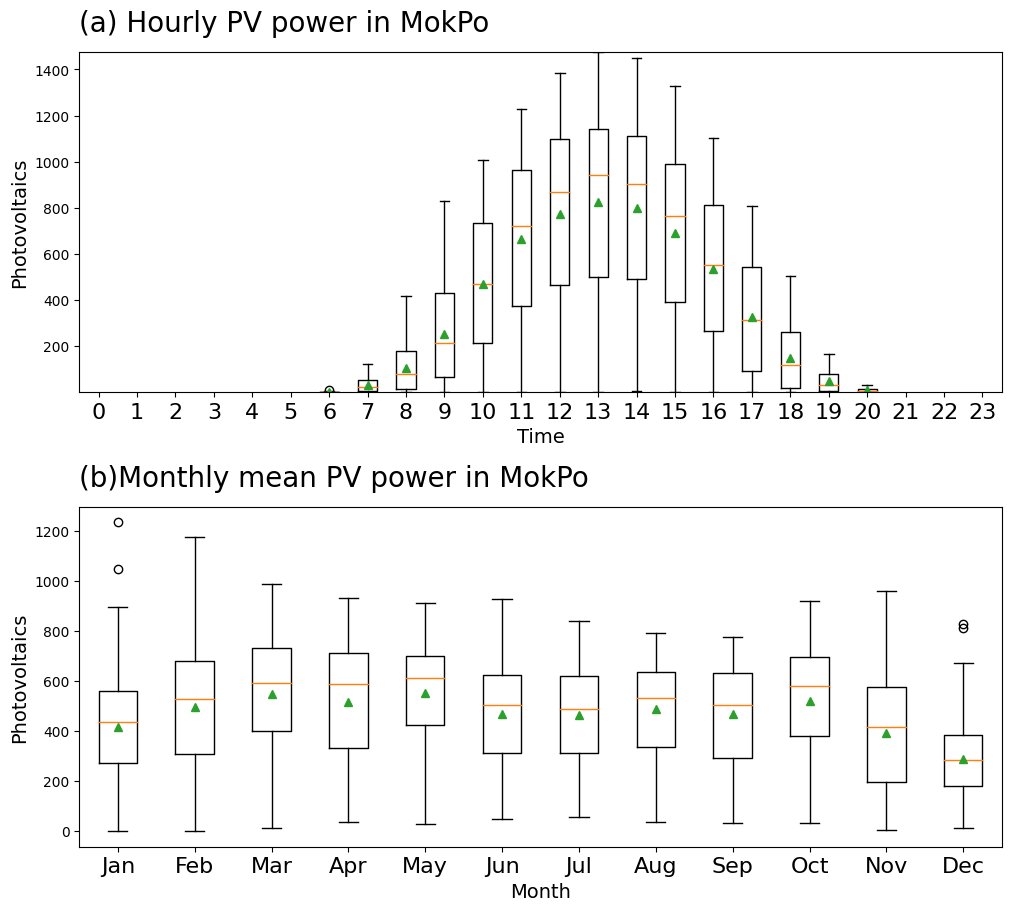

In [30]:
Monthly_plot(Mp_df, 'Photovoltaics', 'MokPo')

In [31]:
print(Jj_df.shape)
Jj_df = Outlier_data(Jj_df)
Jj_df.shape

(8091, 14)


(7769, 14)

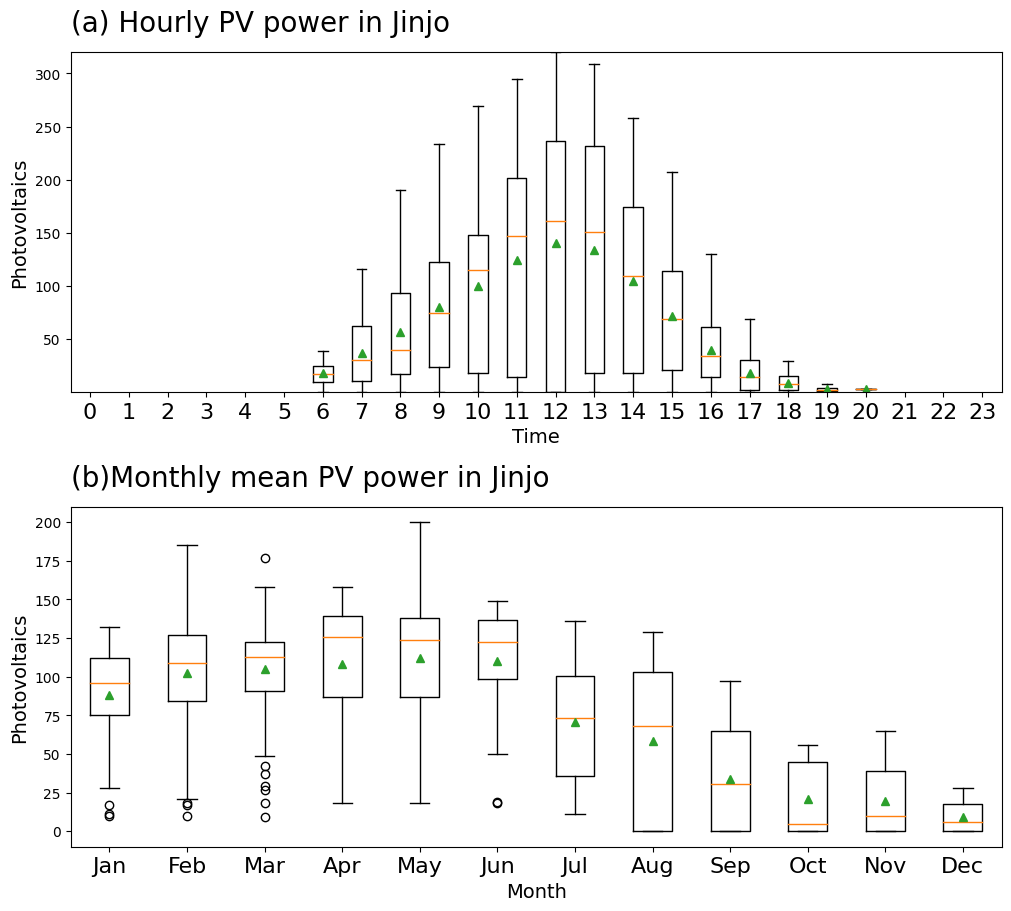

In [32]:
Monthly_plot(Jj_df, 'Photovoltaics', 'Jinjo')

In [33]:
print(Gn_df.shape)
Gn_df = Outlier_data(Gn_df)
Gn_df.shape

(8908, 14)


(8560, 14)

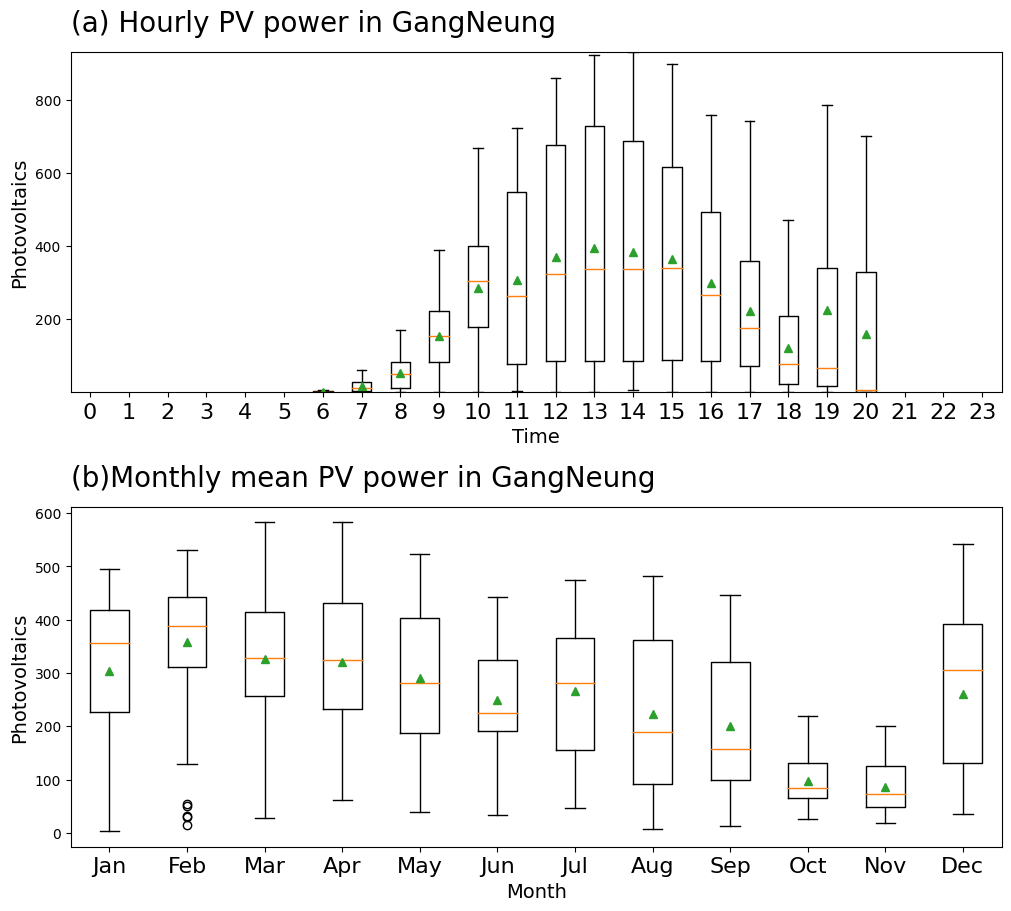

In [34]:
Monthly_plot(Gn_df, 'Photovoltaics', 'GangNeung')

# Distribution of Area

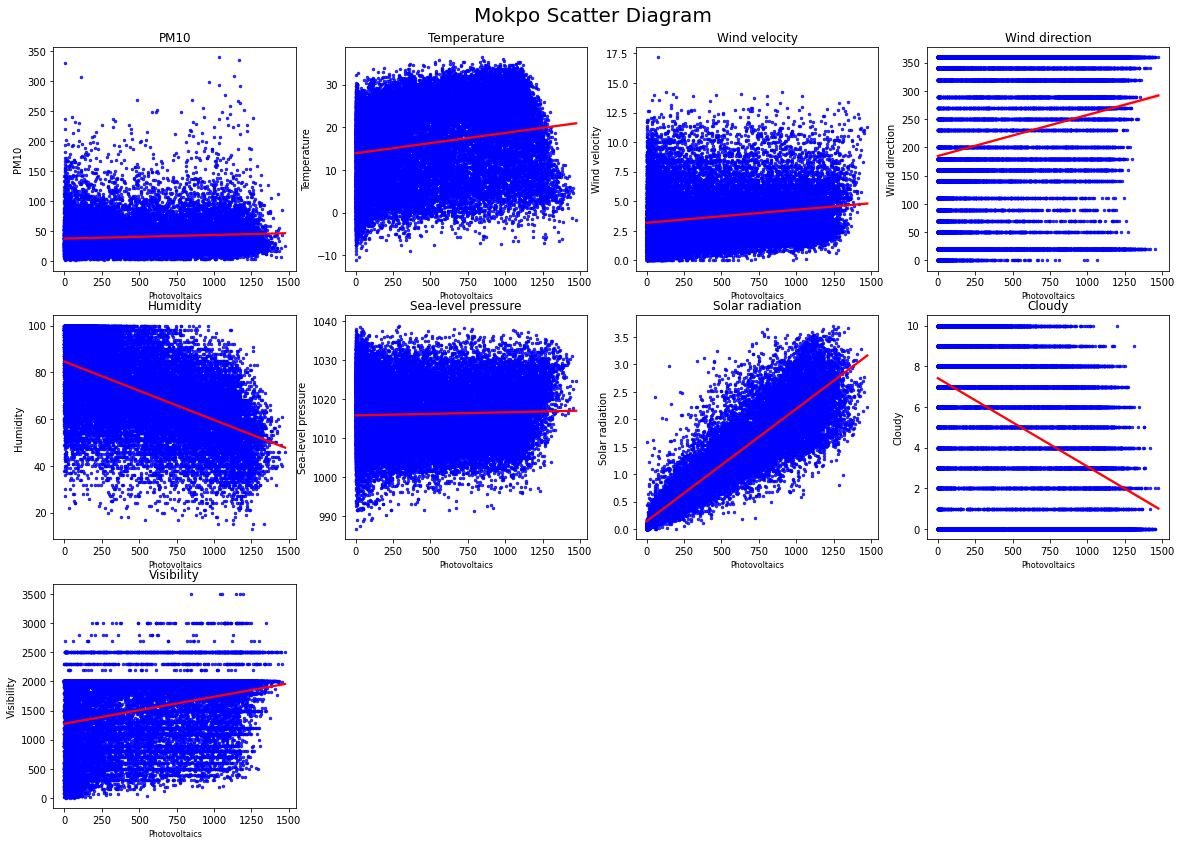

In [35]:
Scatter(Mp_df, 'Photovoltaics',  "Mokpo")

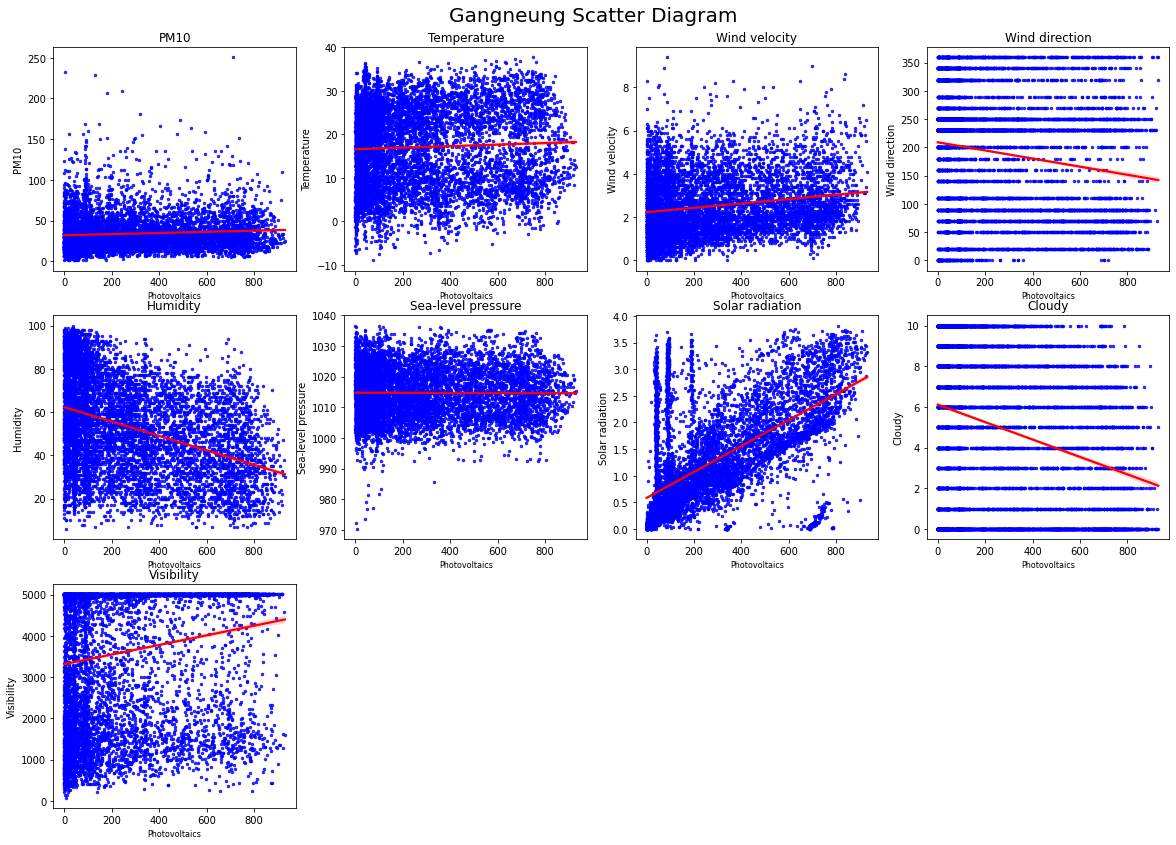

In [36]:
Scatter(Gn_df, 'Photovoltaics', "Gangneung")

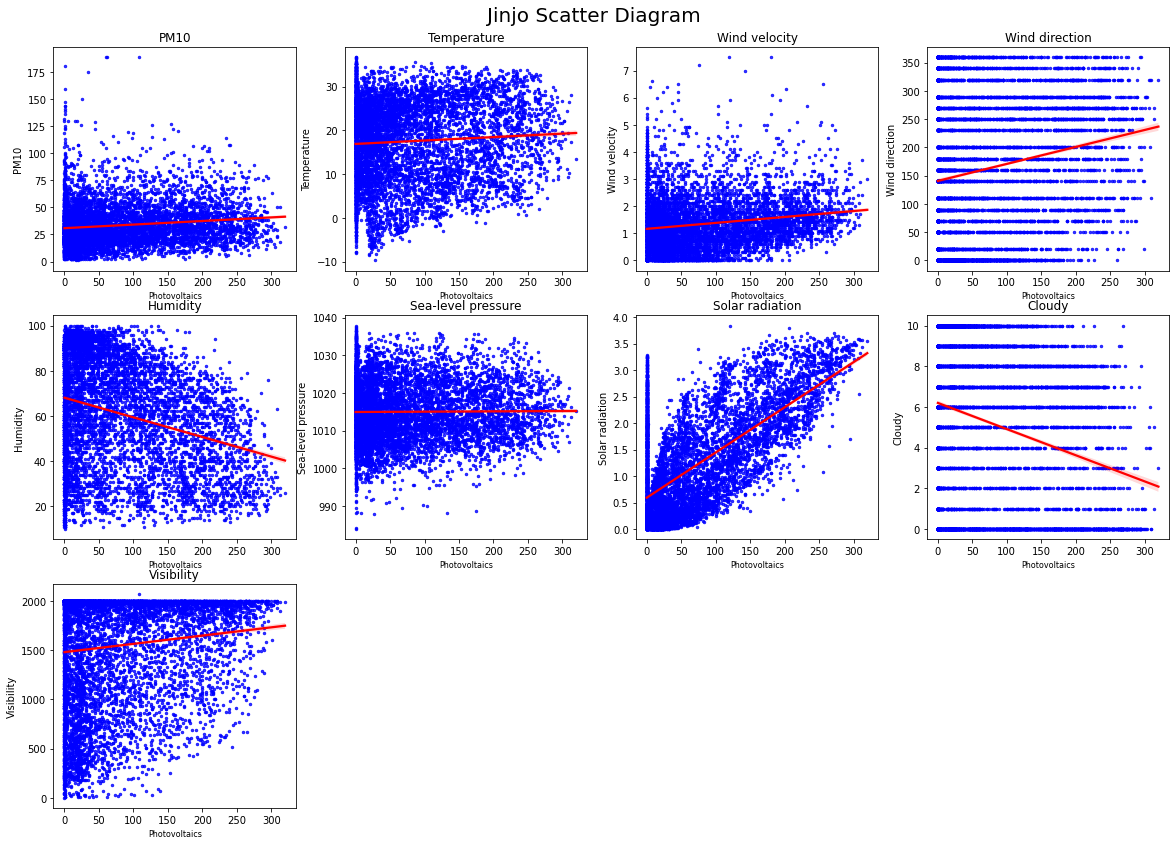

In [37]:
Scatter(Jj_df, 'Photovoltaics', "Jinjo")

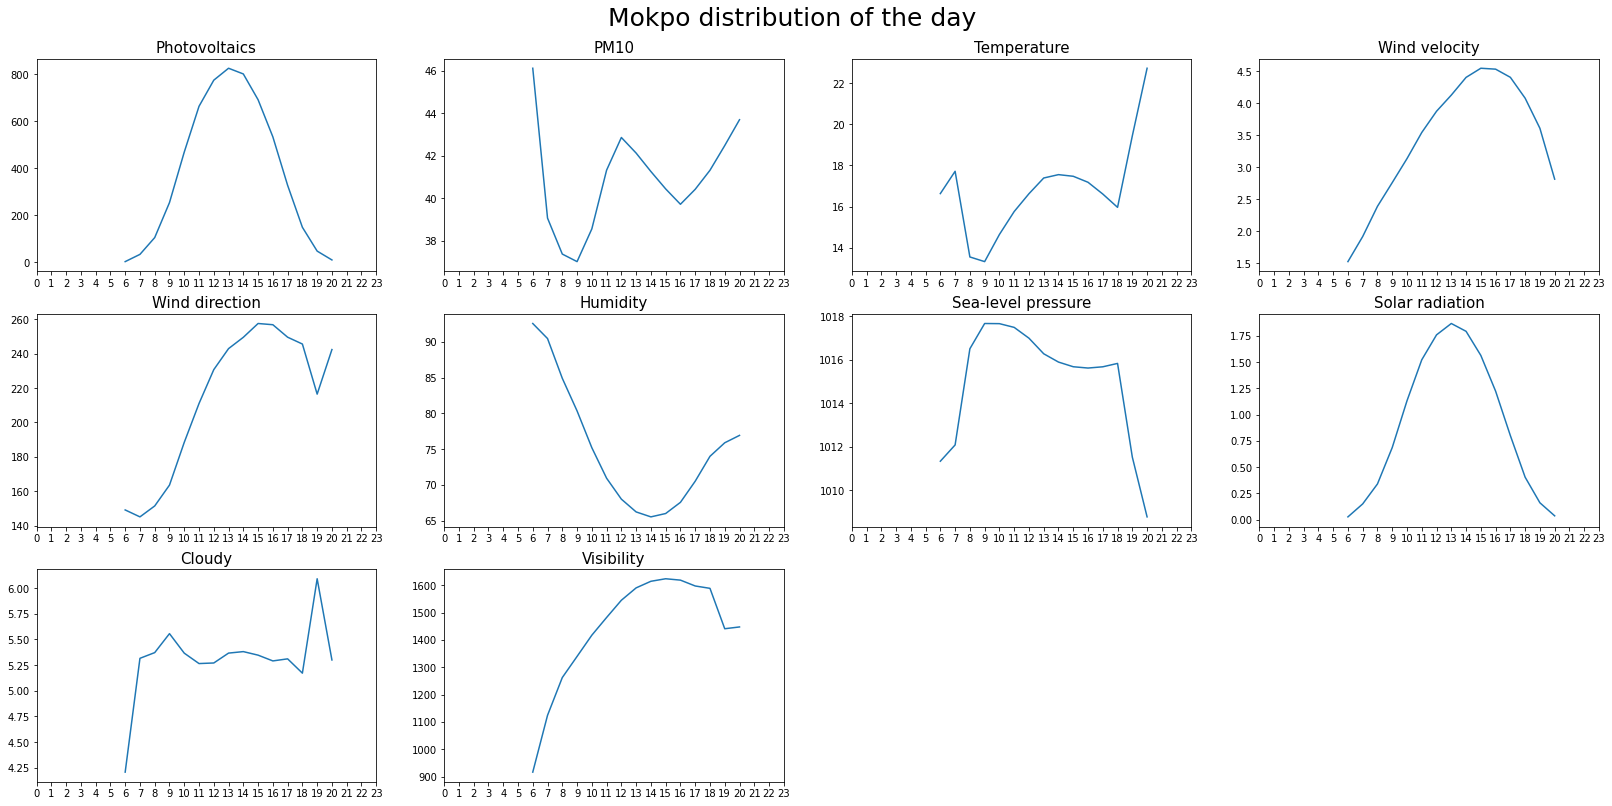

In [38]:
Day_plot(Mp_df, 'Mokpo')

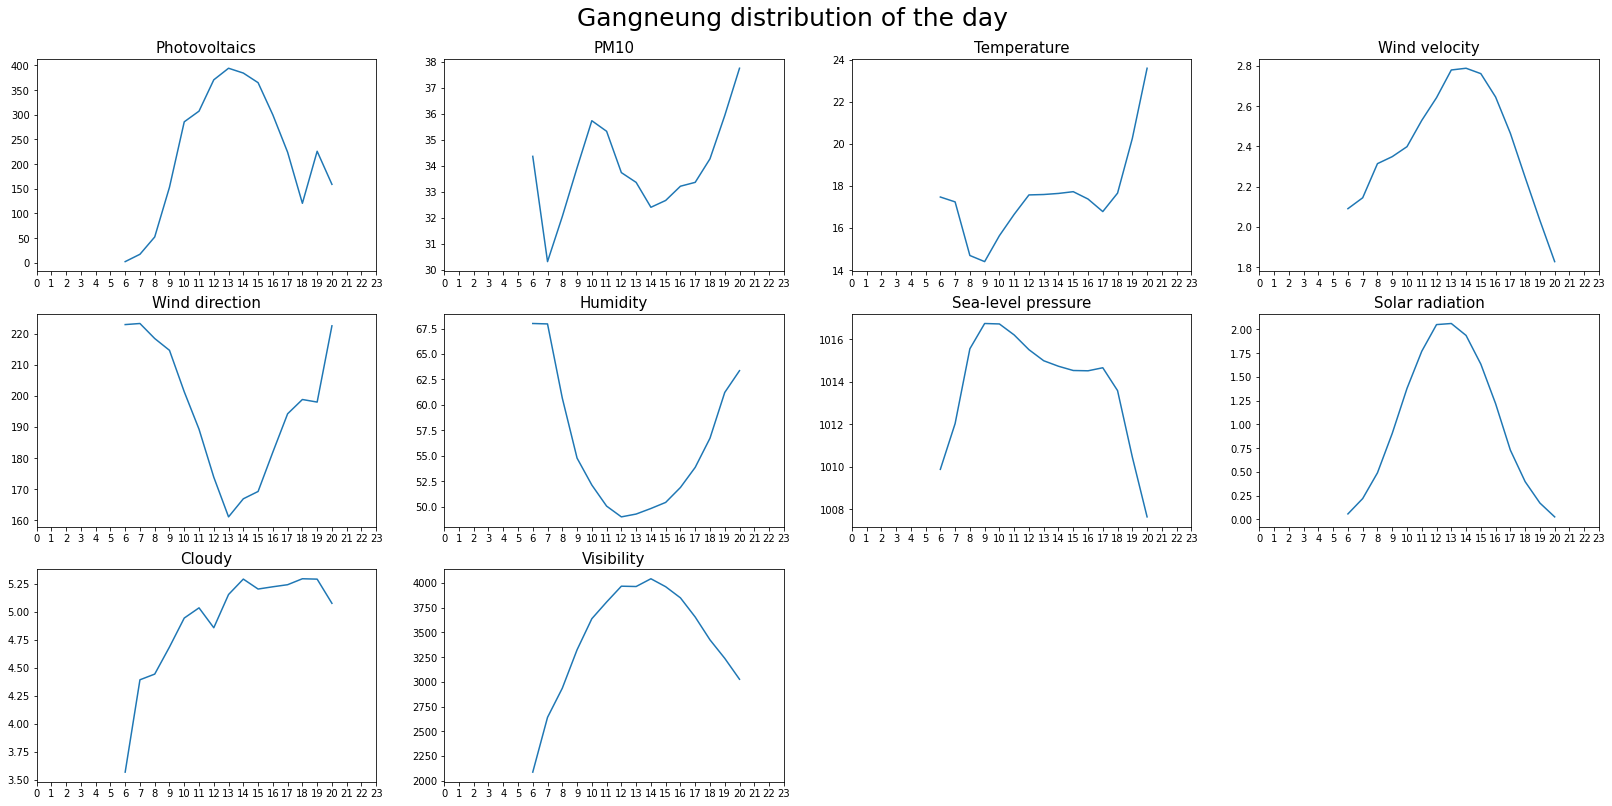

In [39]:
Day_plot(Gn_df, 'Gangneung')

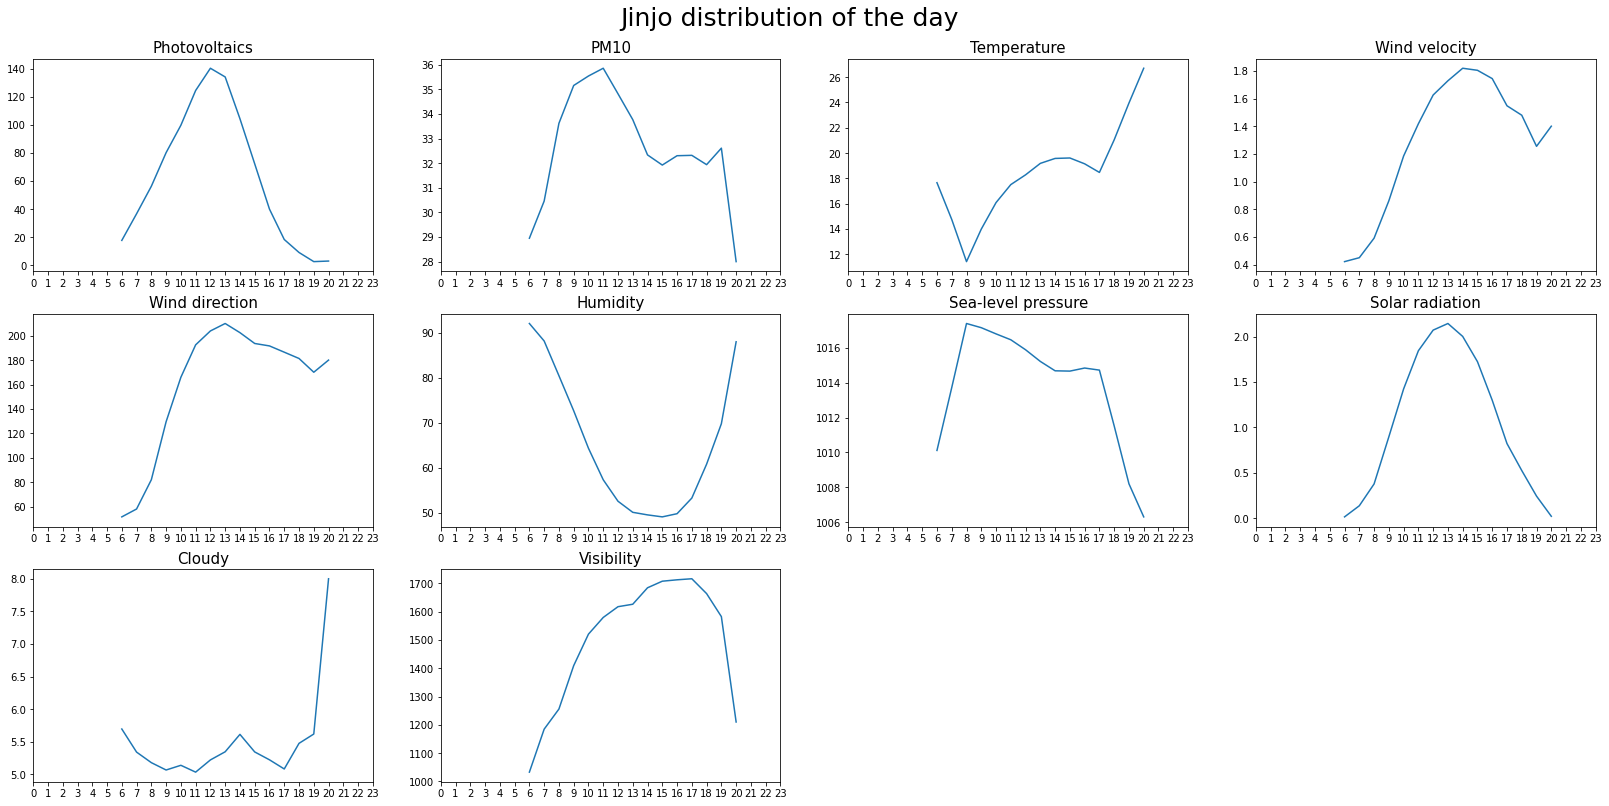

In [40]:
Day_plot(Jj_df, 'Jinjo')

# Final Data
Remove missing values

In [41]:
final_df = pd.concat([Mp_df, Jj_df, Gn_df])
final_df.reset_index(inplace=True, drop=True)
final_df.shape 

(42521, 14)

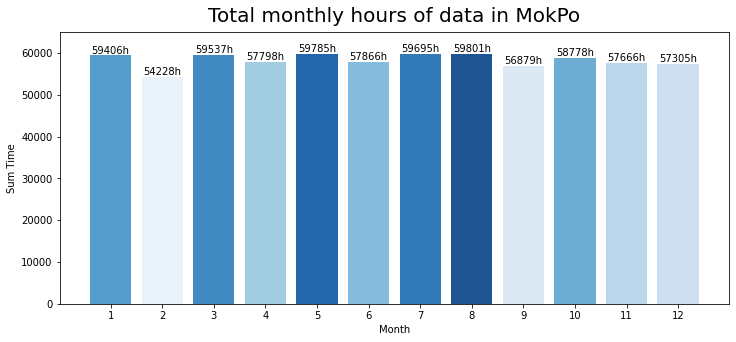

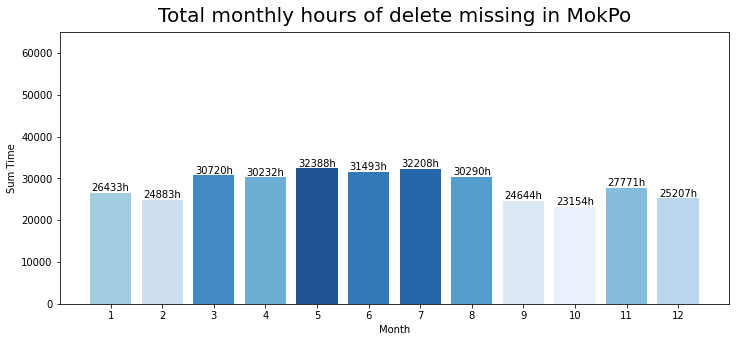

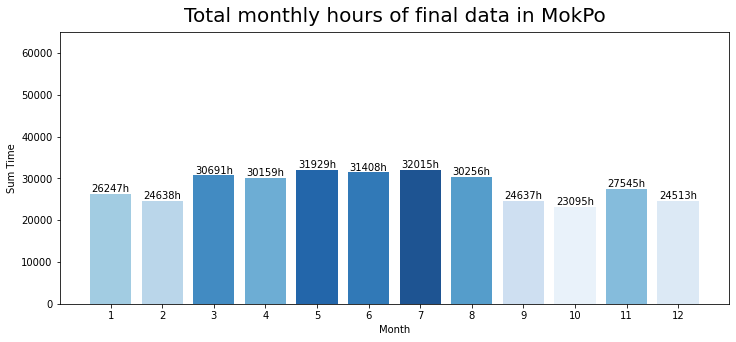

In [42]:
TimeBar(df, '전남 목포시', 'data in MokPo', [0, 65000])
TimeBar(data, '전남 목포시', 'delete missing in MokPo', [0, 65000])
TimeBar(final_df, '전남 목포시', 'final data in MokPo', [0, 65000])

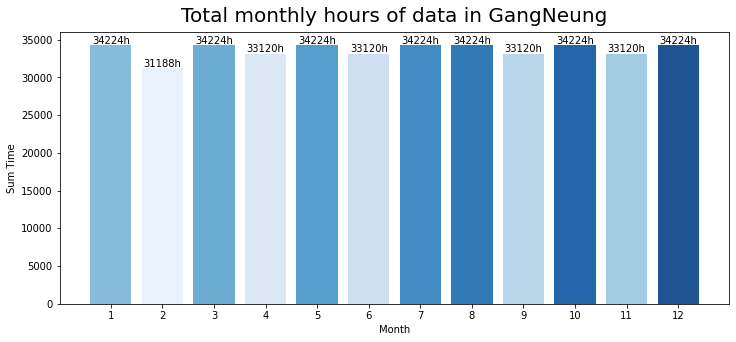

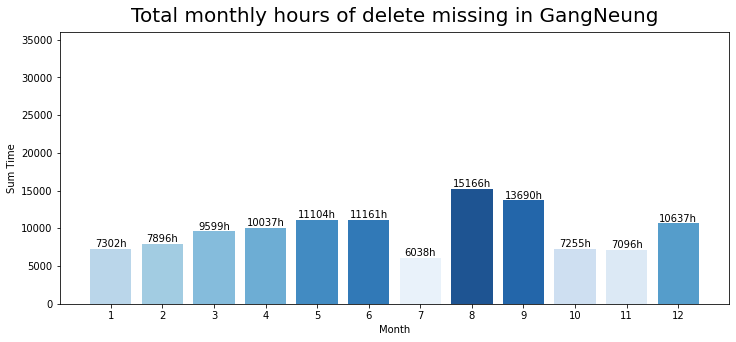

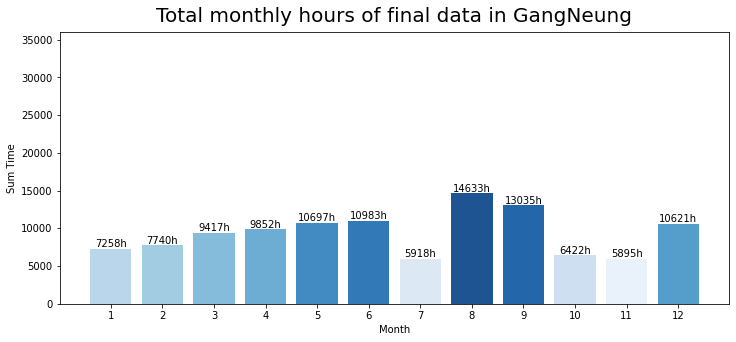

In [43]:
TimeBar(df, '강원 강릉시', 'data in GangNeung', [0,36000])
TimeBar(data, '강원 강릉시', 'delete missing in GangNeung', [0,36000])
TimeBar(final_df, '강원 강릉시', 'final data in GangNeung', [0,36000])

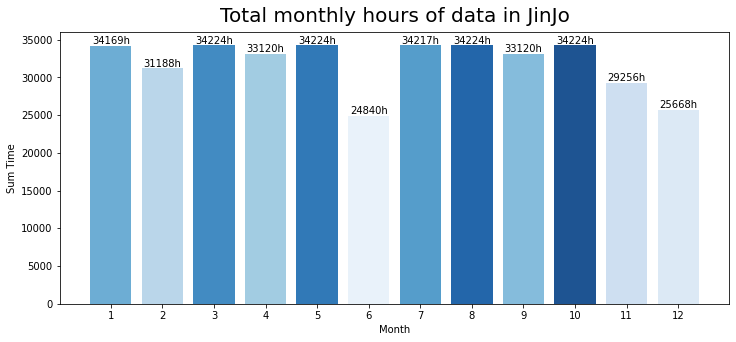

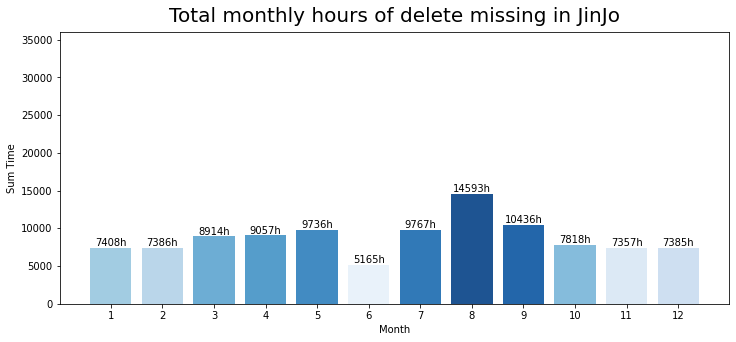

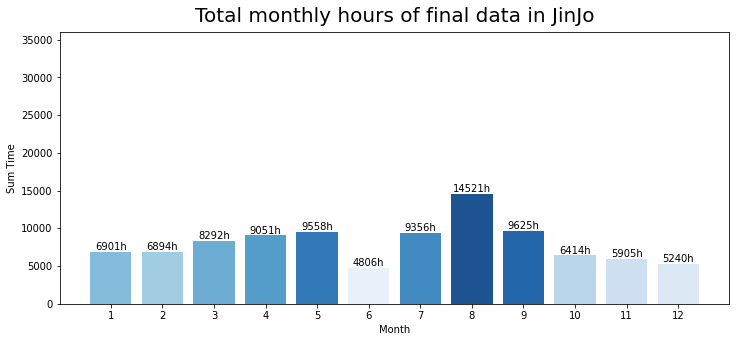

In [44]:
TimeBar(df, '경남 진주시', 'data in JinJo', [0,36000])
TimeBar(data, '경남 진주시', 'delete missing in JinJo', [0,36000])
TimeBar(final_df, '경남 진주시', 'final data in JinJo', [0,36000])

# Save data


In [45]:
area_list = ['전남 목포시', '강원 강릉시', '경남 진주시']
Mp_df, Gn_df, Jj_df = Split_area(final_df, 'Area', area_list)

전체 : (42521, 14)
['전남 목포시'] : (26192, 14)
['강원 강릉시'] : (8560, 14)
['경남 진주시'] : (7769, 14)


In [46]:
Mp_df['Area'].unique()

array(['전남 목포시'], dtype=object)

In [47]:
Gn_df['Area'].unique()

array(['강원 강릉시'], dtype=object)

In [48]:
Jj_df['Area'].unique()

array(['경남 진주시'], dtype=object)

In [49]:
final_df.to_csv('/content/gdrive/MyDrive/SolarPower/TestData.csv', index=None) 
Mp_df.to_csv('/content/gdrive/MyDrive/SolarPower/Mpdata.csv', index=None) 
Gn_df.to_csv('/content/gdrive/MyDrive/SolarPower/Gndata.csv', index=None) 
Jj_df.to_csv('/content/gdrive/MyDrive/SolarPower/Jjdata.csv', index=None) 